<a id='home'></a>
# Data Wrangling Project - WeRateDogs
This project corresponds to the 4th project of Udacity "**Data Analysis Fundamental**". 
Here I will be working with data from [WeRateDogs](https://twitter.com/dog_rates) Twitter account. The objective is to do all the process of data wrangling (gathering, assessing, cleaning and storage) and then a short analysis of data.

Here I will work with 3 different archives:
- WeRateDogs Twitter File, from Udacity team, where have information about rated dogs from tweets.
- Image Predictions File, where a neural network classifies breeds of dogs base on the photograph in the tweet.
- Additional Data via Twitter API. Unfortunately, I can't get the development account from Twitter and for time matters I will work with the file provided by Udacity.


<a id='index'></a>
## Index

1- [Install Libraries](#install_lib)\
2- [Importing Libraries](#importing_lib)\
3- [Gathering](#gathering)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- [Data Issues - Quality](#issuess)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- [Data Issues - Tidiness](#tidiness)\
4- [Assess](#assess)\
5- [Cleaning](#cleaning)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- [Quality](#cleaning_quality)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- [Tidiness](#cleaning_tidiness)\
6- [Analyse Data](#analyse)\
7- [Conclusion](#conclusion)

<a id='install_lib'></a>
# Install libraries

In [1]:
#import sys
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install requests
#!{sys.executable} -m pip install tweepy
#!{sys.executable} -m pip install plotly

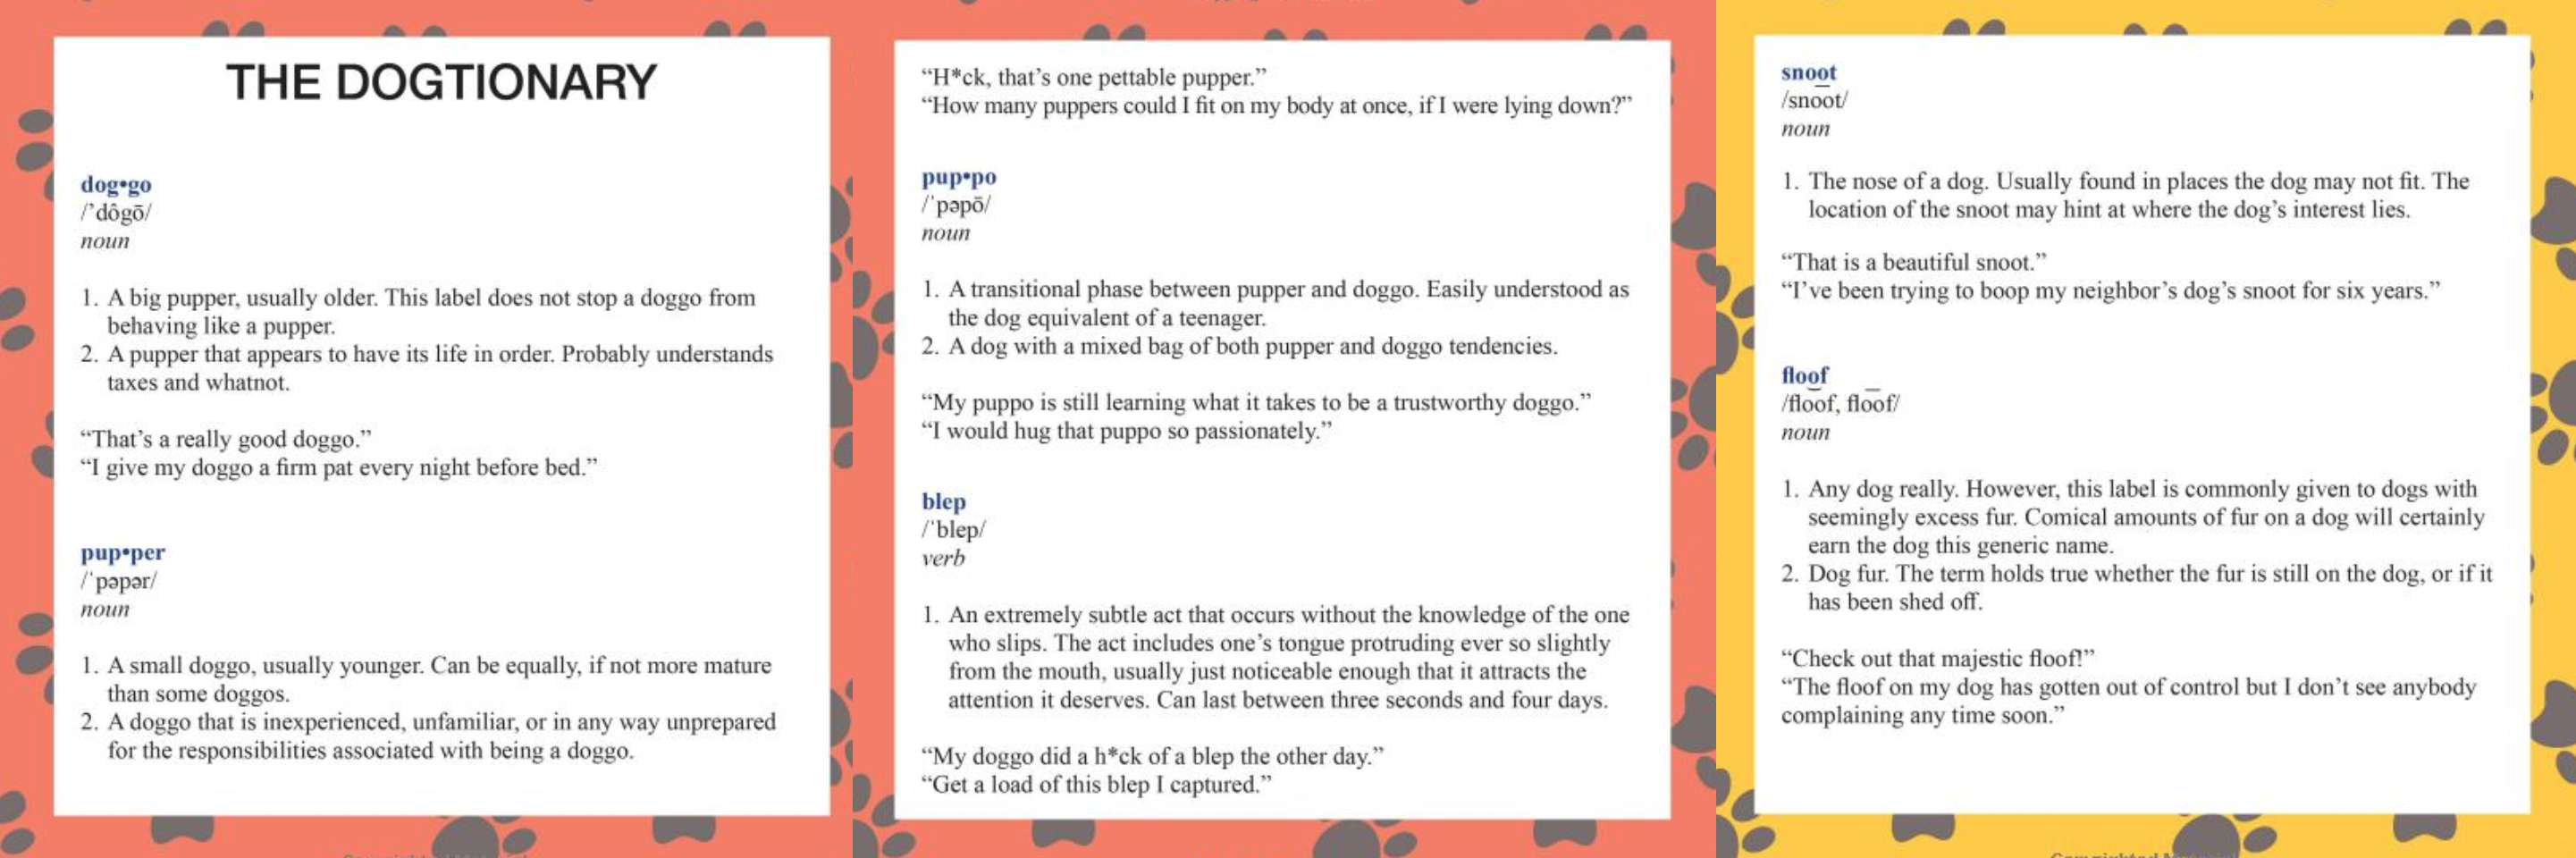

#### Tweet image prediction data dictionary
- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
- etc.

<a id='importing_lib'></a>
## Importing Libraries

[Back to index](#index)

In [2]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import plotly.express as px
import os

In [3]:
pd.set_option('display.max_columns', 600)
pd.options.display.float_format = '{:.2f}'.format

<a id='gathering'></a>
## Gathering Data

I will be working with 3 different data sets:
1. The WeRateDogs Twitter archive from Udacity platform.
2. The tweet image predictions from the url that you can see later.
3. Data obtain with Twitter API throught Tweepy. (As after 1 week I don't have Twitter verification I will proccess with the JSON file from the Udacity platform)

[Back to index](#index)

In [4]:
missing_values_wrd = ['None']
wrd_set = pd.read_csv('twitter-archive-enhanced.csv',
                      na_values=missing_values_wrd
                      )
wrd_set.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1327  705975130514706432                    NaN                  NaN   
223   849412302885593088                    NaN                  NaN   
2016  672169685991993344                    NaN                  NaN   
2171  669328503091937280                    NaN                  NaN   
1975  672997845381865473                    NaN                  NaN   

                      timestamp  \
1327  2016-03-05 04:36:02 +0000   
223   2017-04-05 00:04:08 +0000   
2016  2015-12-02 21:45:16 +0000   
2171  2015-11-25 01:35:25 +0000   
1975  2015-12-05 04:36:04 +0000   

                                                 source  \
1327  <a href="http://twitter.com/download/iphone" r...   
223   <a href="http://twitter.com/download/iphone" r...   
2016  <a href="http://twitter.com/download/iphone" r...   
2171  <a href="http://twitter.com/download/iphone" r...   
1975  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1327  This is Adele. Her tongue flies out of her mou...                  NaN   
223   This is Noosh. He noticed you were in the show...                  NaN   
2016  This is Bradley. That is his sandwich. He carr...                  NaN   
2171  This is Kirk. He just saw a bacon wrapped tenn...                  NaN   
1975  Say hello to Kenzie. She is a fluff ball. 12/1...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1327                       NaN                        NaN   
223                        NaN                        NaN   
2016                       NaN                        NaN   
2171                       NaN                        NaN   
1975                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1327  https://twitter.com/dog_rates/status/705975130...                10   
223   https://twitter.com/dog_rates/status/849412302...                12   
2016  https://twitter.com/dog_rates/status/672169685...                10   
2171  https://twitter.com/dog_rates/status/669328503...                12   
1975  https://twitter.com/dog_rates/status/672997845...                12   

      rating_denominator     name doggo floofer  pupper puppo  
1327                  10    Adele   NaN     NaN  pupper   NaN  
223                   10    Noosh   NaN     NaN     NaN   NaN  
2016                  10  Bradley   NaN     NaN     NaN   NaN  
2171                  10     Kirk   NaN     NaN     NaN   NaN  
1975                  10   Kenzie   NaN     NaN     NaN   NaN

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
path = '/home/anonimo/Documentos/Talento Digital/Data Wrangling Project/'
with open(os.path.join(path, url.split('/')[-1]), mode='wb') as file:
    file.write(r.content)

In [6]:
img_pred = pd.read_csv(os.path.join(path, url.split('/')[-1]),
                       delimiter='\t'
                      )

In [7]:
tweet_json = pd.read_json('tweet-json', lines=True)

<a id='assess'></a>
## Assess

[Back to index](#index)

#### WeRateDog set

In [8]:
wrd_set.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1594  686377065986265092                    NaN                  NaN   
247   845459076796616705                    NaN                  NaN   
2042  671538301157904385                    NaN                  NaN   
410   823322678127919110                    NaN                  NaN   
1037  744709971296780288                    NaN                  NaN   

                      timestamp  \
1594  2016-01-11 02:40:19 +0000   
247   2017-03-25 02:15:26 +0000   
2042  2015-12-01 03:56:22 +0000   
410   2017-01-23 00:13:17 +0000   
1037  2016-06-20 01:54:27 +0000   

                                                 source  \
1594  <a href="http://twitter.com/download/iphone" r...   
247   <a href="http://twitter.com/download/iphone" r...   
2042  <a href="http://twitter.com/download/iphone" r...   
410   <a href="http://twitter.com/download/iphone" r...   
1037  <a href="http://twitter.com/download/iphone" r...   

                                                   text   retweeted_status_id  \
1594  Meet Birf. He thinks he's gone blind. 10/10 ve...                   NaN   
247   RT @dog_rates: Here's a heartwarming scene of ... 756288534030475264.00   
2042  This is Baxter. He's very calm. Hasn't eaten i...                   NaN   
410   This is Wyatt. He's got the fastest paws in th...                   NaN   
1037  This is Harvey. He's stealthy af. 10/10 would ...                   NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1594                       NaN                        NaN   
247              4196983835.00  2016-07-22 00:43:32 +0000   
2042                       NaN                        NaN   
410                        NaN                        NaN   
1037                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1594  https://twitter.com/dog_rates/status/686377065...                10   
247   https://twitter.com/dog_rates/status/756288534...                12   
2042  https://twitter.com/dog_rates/status/671538301...                 8   
410   https://twitter.com/dog_rates/status/823322678...                11   
1037  https://twitter.com/dog_rates/status/744709971...                10   

      rating_denominator    name doggo floofer  pupper puppo  
1594                  10    Birf   NaN     NaN  pupper   NaN  
247                   10     NaN   NaN     NaN     NaN   NaN  
2042                  10  Baxter   NaN     NaN     NaN   NaN  
410                   10   Wyatt   NaN     NaN     NaN   NaN  
1037                  10  Harvey   NaN     NaN     NaN   NaN

In [9]:
wrd_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [10]:
wrd_set.in_reply_to_status_id.unique()

array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
       8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
       8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
       8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
       8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
       8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
       8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
       8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
       7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
       7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
       7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
       6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
       6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
       6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.84481075e+17,
      

In [11]:
f"{wrd_set[~wrd_set['in_reply_to_status_id'].isnull()]['in_reply_to_status_id'][30]:.20f}"

'886266357075128320.00000000000000000000'

In [12]:
wrd_set.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [13]:
wrd_set[~wrd_set.retweeted_status_id.isnull()].sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1043  743835915802583040                    NaN                  NaN   
506   812747805718642688                    NaN                  NaN   
702   786036967502913536                    NaN                  NaN   
895   759159934323924993                    NaN                  NaN   
794   773336787167145985                    NaN                  NaN   

                      timestamp  \
1043  2016-06-17 16:01:16 +0000   
506   2016-12-24 19:52:31 +0000   
702   2016-10-12 02:53:11 +0000   
895   2016-07-29 22:53:27 +0000   
794   2016-09-07 01:47:12 +0000   

                                                 source  \
1043  <a href="http://twitter.com/download/iphone" r...   
506   <a href="http://twitter.com/download/iphone" r...   
702   <a href="http://twitter.com/download/iphone" r...   
895   <a href="http://twitter.com/download/iphone" r...   
794   <a href="http://twitter.com/download/iphone" r...   

                                                   text   retweeted_status_id  \
1043  RT @dog_rates: Extremely intelligent dog here.... 667138269671505920.00   
506   RT @dog_rates: Meet Sammy. At first I was like... 680055455951884288.00   
702   RT @dog_rates: This is Scout. He really wants ... 779834332596887552.00   
895   RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 ht... 670319130621435904.00   
794   RT @dog_rates: Meet Fizz. She thinks love is a... 771380798096281600.00   

      retweeted_status_user_id retweeted_status_timestamp  \
1043             4196983835.00  2015-11-19 00:32:12 +0000   
506              4196983835.00  2015-12-24 16:00:30 +0000   
702              4196983835.00  2016-09-25 00:06:08 +0000   
895              4196983835.00  2015-11-27 19:11:49 +0000   
794              4196983835.00  2016-09-01 16:14:48 +0000   

                                          expanded_urls  rating_numerator  \
1043  https://twitter.com/dog_rates/status/667138269...                10   
506   https://twitter.com/dog_rates/status/680055455...                10   
702   https://twitter.com/dog_rates/status/779834332...                11   
895   https://twitter.com/dog_rates/status/670319130...                11   
794   https://twitter.com/dog_rates/status/771380798...                11   

      rating_denominator   name doggo floofer pupper puppo  
1043                  10    NaN   NaN     NaN    NaN   NaN  
506                   10  Sammy   NaN     NaN    NaN   NaN  
702                   10  Scout   NaN     NaN    NaN   NaN  
895                   10    NaN   NaN     NaN    NaN   NaN  
794                   10   Fizz   NaN     NaN    NaN   NaN

[](#image_prediction_set)
#### Image Prediction Set

In [14]:
img_pred

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1  p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel     0.47    True              collie   
1           1                 redbone     0.51    True  miniature_pinscher   
2           1         German_shepherd     0.60    True            malinois   
3           1     Rhodesian_ridgeback     0.41    True             redbone   
4           1      miniature_pinscher     0.56    True          Rottweiler   
...       ...                     ...      ...     ...                 ...   
2070        2                  basset     0.56    True    English_springer   
2071        1             paper_towel     0.17   False  Labrador_retriever   
2072        1               Chihuahua     0.72    True            malamute   
2073        1               Chihuahua     0.32    True            Pekinese   
2074        1                  orange     0.10   False               bagel   

      p2_conf  p2_dog                           p3  p3_conf  p3_dog  
0        0.16    True            Shetland_sheepdog     0.06    True  
1        0.07    True          Rhodesian_ridgeback     0.07    True  
2        0.14    True                   bloodhound     0.12    True  
3        0.36    True           miniature_pinscher     0.22    True  
4        0.24    True                     Doberman     0.15    True  
...       ...     ...                          ...      ...     ...  
2070     0.23    True  German_short-haired_pointer     0.18    True  
2071     0.17    True                      spatula     0.04   False  
2072     0.08    True                       kelpie     0.03    True  
2073     0.09    True                     papillon     0.07    True  
2074     0.09   False                       banana     0.08   False  

[2075 rows x 12 columns]

In [15]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
img_pred.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [17]:
img_pred[img_pred['p1'].str.contains('setter')].p1.unique()

array(['Gordon_setter', 'English_setter', 'Irish_setter'], dtype=object)

In [18]:
img_pred.p1_dog.describe().to_dict()

{'count': 2075, 'unique': 2, 'top': True, 'freq': 1532}

[](#tweet_json)
#### Tweet Json

In [19]:
tweet_json = pd.read_json('tweet-json', lines=True)

In [20]:
tweet_json.head()

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3 2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4 2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   
3  This is Darla. She commenced a snooze mid meal...      False   
4  This is Franklin. He would like you to stop ca...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   
3  {'media': [{'id': 891689552724799489, 'id_str'...   
4  {'media': [{'id': 891327551943041024, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...                    NaN   

   in_reply_to_status_id_str  in_reply_to_user_id  in_reply_to_user_id_str  \
0                        NaN                  NaN                      NaN   
1                        NaN                  NaN                      NaN   
2                        NaN                  NaN                      NaN   
3                        NaN                  NaN                      NaN   
4                        NaN                  NaN                      NaN   

  in_reply_to_screen_name                                               user  \
0                    None  {'id': 4196983835, 'id_str': '4196983835', 'na...   
1                    None  {'id': 4196983835, 'id_str': '4196983835', 'na...   
2                    None  {'id': 4196983835, 'id_str': '4196983835', 'na...   
3                    None  {'id': 4196983835, 'id_str': '4196983835', 'na...   
4                    None  {'id': 4196983835, 'id_str': '4196983835', 'na...   

   geo  coordinates place  contributors  is_quote_status  retweet_count  \
0  NaN          NaN  None           NaN            False           8853   
1  NaN          NaN  None           NaN            False           6514   
2  NaN          NaN  None           NaN            False           4328   
3  NaN          NaN  None           NaN            False           8964   
4  NaN          NaN  None           NaN            False           9774   

   favorite_count  favorited  retweeted  possibly_sensitive  \
0           39467      False      False                0.00   
1           33819      False      False                0.00   
2           25461      False      False                0.00   
3           42908      False      False                0.00   
4           41048      False      False                0.00   

   possibly_sensitive_appealable lang retweeted_status  quoted_status_id  \
0                           0.00   en              NaN              

In [21]:
tweet_json.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [22]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

<a id='issuess'></a>
### Data Issuess
#### Quality
###### **`wrd_set` table**
- `timestamp` have "+0000" in every value.
- `timestamp` is not in DataTime format.
- `in_reply_to_status_id` I only need the actual tweet and not the replies.
- `in_reply_to_user_id` I only need the actual tweet and not the replies.
- `source` is in HTML format. (It is the source from where the tweet was made)
- `retweeted_status_id` I only need the actual tweet and not the replies.
- `retweeted_status_user_id` I only need the actual tweet and not the replies.

###### **`img_pred` table**
- `p1` some values with capital letters.
- `p1` words like 'laptop', 'basketball', 'limousine', 'toilet_seat' and much much more. Not all rows are Dogs, for this project I only need Dogs.
- `p1` **especial mention to the index 930 with his hippopotamus** (Not a problem but is worth to mention)

###### **`tweet_json` table**
- `created_at` have +00:00 in every value. (Could be not an actual problem because is in datetime format)
- `source` is in HTML format. (It is the source from where the tweet was made)
- `in_reply_to_status_id` I only need the actual tweet and not the replies.
- `in_reply_to_status_id_str` I only need the actual tweet and not the replies.
- `in_reply_to_user_id` I only need the actual tweet and not the replies.
- `in_reply_to_user_id_str` I only need the actual tweet and not the replies.
- `retweeted_status` I only need the actual tweet and not the replies.
- `in_reply_to_screen_name` I only need the actual tweet and not the replies.
- `truncated` Is only False.

<a id='tidiness'></a>
#### Tidiness
###### **`wrd_set` table**
- The columns `doggo`, `floofer`, `pupper` and `puppo` have "None" values instaead of Pandas Nan
- The columns `doggo`, `floofer`, `pupper` and `puppo` should be one column

###### **`img_pred` table**
- Don't recognize anyone

###### **`tweet_json` table**
- `entities`, `extended_entities` and `user` are nested in JSON format.
- `display_text_range` is nested in list format.
- `full_text` have the link and the text.
- `display_text_range` is where start and end the message

[Back to index](#index)

_______________
**For this course the requirements are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.**
_______________

<a id='cleaning'></a>
## Cleaning

- [Quality](#cleaning_quality)
- [Tidiness](#cleaning_tidiness)

[Back to index](#index)

In [23]:
clean_wrd_set = wrd_set.copy()
clean_img_pred = img_pred.copy()
clean_tweet_json = tweet_json.copy()

<a id='cleaning_quality'></a>
#### Quality

[Back to cleaning](#cleaning)

###### **`wrd_set` table**
- `timestamp` have "+0000" in every value.\
How: Apply function and remove the " +0000"
- `timestamp` is not in DataTime format.\
How: Set the correct format for datetime
- `in_reply_to_status_id` I only need the actual tweet and not the replies.\
How: Drop his index and drop column.
- `in_reply_to_user_id` I only need the actual tweet and not the replies.\
How: Drop his index and drop column.
- `source` is in HTML format. (It is the source from where the tweet was made)\
How: Spliting the value and keep the correct through a function.
- `retweeted_status_id` I only need the actual tweet and not the replies.\
How: Drop his index and drop column.
- `retweeted_status_user_id` iI only need the actual tweet and not the replies.\
How: Drop his index and drop column.

In [24]:
clean_wrd_set.timestamp = clean_wrd_set.timestamp.apply(lambda x: x.split(' +0000')[0])

In [25]:
clean_wrd_set.timestamp = pd.to_datetime(clean_wrd_set.timestamp, format='%Y-%m-%d %H:%M:%S')

In [26]:
clean_wrd_set.drop(clean_wrd_set[~clean_wrd_set.in_reply_to_status_id.isnull()].index.values, inplace=True)
clean_wrd_set.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis='columns', inplace=True)

In [27]:
clean_wrd_set.drop(clean_wrd_set[~clean_wrd_set.retweeted_status_id.isnull()].index.values, inplace=True)
clean_wrd_set.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis='columns', inplace=True)

In [28]:
clean_wrd_set.source.unique()
# Are 4 unique categorires

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [29]:
clean_wrd_set.source = clean_wrd_set.source.apply(lambda x: x.split('>')[1]).apply(lambda x: x.split('<')[0])

def category(x):
    a = ''
    if x == 'Twitter for iPhone':
        a += 'iphone'
    elif x == 'Twitter Web Client':
        a += 'web'
    elif x == 'TweetDeck':
        a += 'tweetdeck'
    else:
        a += 'vine'
    
    return a

clean_wrd_set.source = clean_wrd_set.source.apply(lambda x: category(x))

###### **`img_pred` table**
- `p1` some values with capital letters.
- `p1` words like 'laptop', 'basketball', 'limousine', 'toilet_seat' and much much more. Not all rows are Dogs, for this project I only need Dogs.
- `p1` **special mention to the index 930 with his hippopotamus** (Not a problem but is worth to mention).
- `img_num` drop this.

In [30]:
clean_img_pred.p1 = clean_img_pred.p1.str.lower()
clean_img_pred.p2 = clean_img_pred.p2.str.lower()
clean_img_pred.p3 = clean_img_pred.p3.str.lower()

In [31]:
clean_img_pred.drop(clean_img_pred[~clean_img_pred.p1_dog].p1_dog.index.values, inplace=True)

I will drop the 2nd and 3th predictions, this because I look some data sample and in every case it will okay with first prediction. Anyway, the 2nd prediction with a result of not a dog is only 8% of the total so is not big assuming that all samples that I see was correct with 1st prediction.

In [32]:
'{}%'.format(round(len(clean_img_pred[(~clean_img_pred.p2_dog) & (clean_img_pred.p1_dog)])/len(clean_img_pred)*100, 2))

'8.75%'

In [33]:
clean_img_pred.drop(['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis='columns', inplace=True)

**Special mention to the index 930 with his hippopotamus** \
![especial mention to the index 930 with his hippopotamus](https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg)

###### **`tweet_json` table**
- `created_at` have +00:00 in every value. **Not a real problem, but for consistency in format I prefer share the same format in tables**\
How: Apply function and remove the "+00:00" then transformt to datetime again.
- `source` is in HTML format. (It is the source from where the tweet was made)\
How: Spliting the value and keep the correct through a function.
- `truncated` Is only False.\
How: Drop column

In [34]:
clean_tweet_json.source = clean_tweet_json.source.apply(lambda x: x.split('>')[1]).apply(lambda x: x.split('<')[0])
clean_tweet_json.source = clean_tweet_json.source.apply(lambda x: category(x))

In [35]:
clean_tweet_json.created_at = clean_tweet_json.created_at.apply(lambda x: str(x).split('+00:00')[0])
clean_tweet_json.created_at = pd.to_datetime(clean_tweet_json.created_at, format='%Y-%m-%d %H:%M:%S')

In [36]:
clean_tweet_json.drop(clean_tweet_json[~clean_tweet_json.in_reply_to_status_id.isnull()].index.values, inplace=True)
clean_tweet_json.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str'], axis='columns', inplace=True)

In [37]:
clean_tweet_json.drop(['id_str', 'retweeted', 'retweeted_status', 'entities', 'extended_entities', 'user'], axis='columns', inplace=True)

In [38]:
clean_tweet_json.drop(['truncated'], axis='columns', inplace=True)

<a id='cleaning_tidiness'></a>
#### Tidiness

[Back to cleaning](#cleaning)

###### **`wrd_set` table**
- The columns `doggo`, `floofer`, `pupper` and `puppo` have "None" values instaead of Pandas Nan **(Already fixed when load data)**
- The columns `doggo`, `floofer`, `pupper` and `puppo` should be one column

In [39]:
clean_wrd_set['dogtionary'] = clean_wrd_set.doggo.fillna(clean_wrd_set.floofer).fillna(clean_wrd_set.pupper).fillna(clean_wrd_set.puppo)
clean_wrd_set.drop(clean_wrd_set.columns[-5:-1], axis='columns', inplace=True)

______________________

###### **`tweet_json` table**
- `full_text` have the link and the text.\
How: Spliting the value and keep in diferent columns.
- `display_text_range` is where start and end the message\
How: Only keep the second number as I see that is the lenght of the message

In [40]:
clean_tweet_json['url'] = clean_tweet_json.full_text.apply(lambda x: x[x.find(' https')+1:])
clean_tweet_json.full_text = clean_tweet_json.full_text.apply(lambda x: x[:x.find(' https')])

In [41]:
clean_tweet_json.display_text_range = clean_tweet_json.display_text_range.apply(lambda x: x[1])

<a id='merge'></a>
## Merge Data

To merge, first I need to know the shape of tables.\
\
As I want the columns have raitings without "NaN" values I will merge on `clean_wrd_set`\
\
Drop all columns from `clean_tweet_json` that I will not use before the Merge\
Drop column `text` from `clean_wrd_set` have the same information that `full_text` from `clean_tweet_json`\
Drop column `expanded_urls` from `clean_wrd_set`

[Back to index](#index)

In [42]:
clean_tweet_json.drop(['created_at', 'in_reply_to_screen_name', 'geo', 'coordinates', 'source',
                       'place', 'contributors', 'is_quote_status', 'favorited', 'possibly_sensitive',
                       'possibly_sensitive_appealable', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
                      axis='columns', inplace=True)
clean_wrd_set.drop(['text', 'expanded_urls'], axis='columns', inplace=True)

In [43]:
clean_wrd_set.shape

(2097, 7)

In [44]:
clean_img_pred.shape

(1532, 5)

In [45]:
clean_tweet_json.shape

(2276, 7)

In [46]:
merged_data_first = pd.merge(clean_wrd_set, clean_tweet_json, how='left', left_on='tweet_id', right_on='id').drop('id', axis='columns')

In [47]:
twitter_archive_master = pd.merge(merged_data_first, clean_img_pred, how='left', on='tweet_id')

________________________________________________

In the analysis part I see that the some data have wrong ratings probably because the algorithm only take the first "x/y" that find.

The 948 index was a missunderstood of the real tweet. Have the real values in `full_text`

In [48]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 722974582966214656].rating_numerator.index.values, ['rating_numerator']] = 13
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 722974582966214656].rating_numerator.index.values, ['rating_denominator']] = 10

The 1474 index say "Average of 11.26/10", assuming it was 11

In [49]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 680494726643068929].rating_numerator.index.values, ['rating_numerator']] = 13

The 403 index haven't rating, drop it.

In [50]:
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.tweet_id == 810984652412424192].index.values, inplace=True)

The 528 index say "9.75/10", approximating to 10.

In [51]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 786709082849828864].rating_numerator.index.values, ['rating_numerator']] = 13

The 339 index make no sense, drop it.

In [52]:
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.tweet_id == 820690176645140481].index.values, inplace=True)

The 528 index say "11.27/10", approximating to 11.

In [53]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 778027034220126208].rating_numerator.index.values, ['rating_numerator']] = 13

The 339 index make no sense, drop it.

In [54]:
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.tweet_id == 758467244762497024].index.values, inplace=True)

The 339 index make no sense, drop it.

In [55]:
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.tweet_id == 731156023742988288].index.values, inplace=True)

The 770 index make no sense, drop it.

In [56]:
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.tweet_id == 749981277374128128].index.values, inplace=True)

The 985 index say "11/10".

In [57]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 716439118184652801].rating_numerator.index.values, ['rating_numerator']] = 13
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 716439118184652801].rating_numerator.index.values, ['rating_denominator']] = 10

The 985 index say "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody", set in 11/10.

In [58]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 713900603437621249].rating_numerator.index.values, ['rating_numerator']] = 11
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 713900603437621249].rating_numerator.index.values, ['rating_denominator']] = 10

The 1036 index say "Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80", set in 10/10.

In [59]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 710658690886586372].rating_numerator.index.values, ['rating_numerator']] = 10
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 710658690886586372].rating_numerator.index.values, ['rating_denominator']] = 10

The 1056 index says "45/50" for 5 dogs, set in 9/10

In [60]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 709198395643068416].rating_numerator.index.values, ['rating_numerator']] = 9
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 709198395643068416].rating_numerator.index.values, ['rating_denominator']] = 10

The 1129 index make no sense, drop it.

In [61]:
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.tweet_id == 704054845121142784].index.values, inplace=True)

The 1210 index say "Happy Wednesday here's a bucket of pups. 44/40 would pet all at once", set to 11/10.

In [62]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 697463031882764288].rating_numerator.index.values, ['rating_numerator']] = 11
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 697463031882764288].rating_numerator.index.values, ['rating_denominator']] = 10

The 1399 index say "...Clever puppers 121/110", set to 11/10.

In [63]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 684222868335505415].rating_numerator.index.values, ['rating_numerator']] = 11
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 684222868335505415].rating_numerator.index.values, ['rating_denominator']] = 10

The 1540 index say "...Total of 144/120 ...I think", set to 11/10.

In [64]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 677716515794329600].rating_numerator.index.values, ['rating_numerator']] = 11
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 677716515794329600].rating_numerator.index.values, ['rating_denominator']] = 10

The 1602 index say "...Total score: 88/80 would...", set to 11/10.

In [65]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 675853064436391936].rating_numerator.index.values, ['rating_numerator']] = 11
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 675853064436391936].rating_numerator.index.values, ['rating_denominator']] = 10

The 1821 index make no sense, drop it.

In [66]:
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.tweet_id == 670842764863651840].index.values, inplace=True)

The 853 index say "and our second ever 14/10...", set to 14/10.

In [67]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 740373189193256964].rating_numerator.index.values, ['rating_numerator']] = 11
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 740373189193256964].rating_numerator.index.values, ['rating_denominator']] = 10

The 948 index say "...13/10 for all", set to 13/10

In [68]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 722974582966214656].rating_numerator.index.values, ['rating_numerator']] = 11
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 722974582966214656].rating_numerator.index.values, ['rating_denominator']] = 10

The 1426 index say "...spotted by the helicopter 10/10", set to 10/10

In [69]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 682962037429899265].rating_numerator.index.values, ['rating_numerator']] = 11
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 682962037429899265].rating_numerator.index.values, ['rating_denominator']] = 10

The 2076 index say "...the collar. 9/10", set 9/10.

In [70]:
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 666287406224695296].rating_numerator.index.values, ['rating_numerator']] = 9
twitter_archive_master.loc[twitter_archive_master[twitter_archive_master.tweet_id == 666287406224695296].rating_numerator.index.values, ['rating_denominator']] = 10

_____________________________________________________________

Changing the "Nan" values of `dogtionary` to other.

In [71]:
twitter_archive_master.dogtionary.fillna('other', inplace=True)

Don't make sense to have the column `p1_dog` because I drop the False values.

In [72]:
twitter_archive_master.drop('p1_dog', axis='columns', inplace=True)

_______________________________________________________

#### Storage Data

In [73]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

<a id='analyse'></a>
## Analyse Data

[Back to index](#index)

In [74]:
tam = twitter_archive_master.copy()

In [75]:
tam.sample(3)

tweet_id           timestamp  source  rating_numerator  \
1673  674082852460433408 2015-12-08 04:27:30  iphone                11   
1130  703774238772166656 2016-02-28 02:50:28  iphone                10   
547   783821107061198850 2016-10-06 00:08:09  iphone                12   

      rating_denominator   name dogtionary  \
1673                  10      a      other   
1130                  10    NaN      other   
547                   10  Mairi      other   

                                              full_text  display_text_range  \
1673  This is a Sagitariot Baklava mix. Loves her ne...                  94   
1130            "YOU CAN'T HANDLE THE TRUTH" both 10/10                  63   
547   This is Mairi. She has mastered the art of cam...                  77   

      retweet_count  favorite_count lang                      url  \
1673            186             804   en  https://t.co/Bko5kFJYUU   
1130            526            2020   en  https://t.co/ZvxdB4i9AG   
547            2269            8209   en  https://t.co/STcPjiNAHp   

                                              jpg_url                  p1  \
1673  https://pbs.twimg.com/media/CVrSxy7WsAAFD2F.jpg          pomeranian   
1130  https://pbs.twimg.com/media/CcRO8FmW4AAzazk.jpg  labrador_retriever   
547   https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg    lakeland_terrier   

      p1_conf  
1673     0.67  
1130     0.99  
547      0.27

In [76]:
plot1 = px.histogram(tam, x='dogtionary')
plot1.update_layout(title='Dogtionary Histogram', title_x=0.5, xaxis_title='Dogtionary', yaxis_title='Count')

In [77]:
plot2 = px.box(tam, x='dogtionary', y='rating_numerator')
plot2.update_layout(title='Dogtionary Boxplot', title_x=0.5, xaxis_title='Dogtionary Category', yaxis_title='Rating')

As we can see in the graphs the actual people who use dogtionary to define his dog are few ones.\
The top value for all categories of dogtionary is 14, and in all cases, the 3/4 quartiles are above 10 points and are the same with medians that are above 11 in all cases.

In [78]:
plot3 = px.histogram(tam, x='timestamp')
plot3.update_layout(title='Date Histogram', title_x=0.5, xaxis_title='Date', yaxis_title='Count')

In [79]:
plot4 = px.scatter(tam, x='timestamp', y='rating_numerator')
plot4.update_layout(title='Date and Rating Relation', title_x=0.5, xaxis_title='Date', yaxis_title='Rating')

In the graphs above we can see that it appears to be a little correlation between date and rating, as time pass are fewer bad ratings. Nevertheless, we can't assume causality and is important to mention that we have fewer data points as the date it's closer to the present.

In [80]:
plot5 = px.scatter(tam, x='favorite_count', y='rating_numerator')
plot5.update_layout(title='Mark as a Favorite and Rating Relation', title_x=0.5, xaxis_title='Favorite Count', yaxis_title='Rating')

In [81]:
plot6 = px.scatter(tam, x='retweet_count', y='rating_numerator')
plot6.update_layout(title='Retweeted and Rating Relation', title_x=0.5, xaxis_title='Retweet Count', yaxis_title='Rating')

In graph 5 and 6 we can see as well a little correlation but pointless.

In [82]:
plot7 = px.bar(x=tam.p1.value_counts().to_dict().keys(), y=tam.p1.value_counts().to_dict().values())
plot7.update_layout(title='Most Populars Breeds', title_x=0.5, xaxis_title='Breed', yaxis_title='Count')

In [83]:
xplot8 = list(tam.p1.value_counts().to_dict().keys())[:10]
yplot8 = list(tam.p1.value_counts().to_dict().values())[:10]
plot8 = px.bar(x=xplot8, y=yplot8)
plot8.update_layout(title='Top 10 Common Breeds', title_x=0.5, xaxis_title='Breed', yaxis_title='Count')

In [84]:
golden = tam[tam.p1.isin(['golden_retriever', 'labrador_retriever'])].p1.value_counts().to_list()[0]
labrador = tam[tam.p1.isin(['golden_retriever', 'labrador_retriever'])].p1.value_counts().to_list()[1]
total_nonull = tam.p1.count()
r_golden = (golden/total_nonull)*100
r_labrador = (labrador/total_nonull)*100
print('The Golden represent {}% of total.\nThe Labrador represent {}% of total.'.format(round(r_golden, 2), round(r_labrador, 2)))
print('Combine is {}%.'.format(round(r_golden+r_labrador, 2)))

The Golden represent 9.32% of total.
The Labrador represent 6.37% of total.
Combine is 15.7%.


In [85]:
xplot9 = list(tam.p1.value_counts().to_dict().keys())[:20]
data_plot9 = tam[tam.p1.isin(xplot9)]
plot9 = px.box(data_plot9, x='p1', y='rating_numerator')
plot9.update_layout(title='Breed and Rating Relation', title_x=0.5, xaxis_title='Breed, Sort by Commonly of the Breed ', yaxis_title='Rating')
plot9.update_xaxes(categoryarray=xplot9)

As we can see, the most popular are the Retrievers, Golden with 9.32% and Labrador with 6.37%, combine they represent 15.7% of the total breeds in the dataset. If we see the 20th commons breed we can see that almost everyone has 3/4 quartiles above 10 points. By the eye, Pugs are the breed with more variance in his datapoints and closely followed by Chihuahuas.

In [86]:
xplot10 = list(tam.p1.value_counts().to_dict().keys())[:30]
data_plot10 = tam[tam.p1.isin(xplot10)]
plot10 = px.box(data_plot10, x='p1', y='p1_conf')
plot10.update_layout(title='Confidence in Identification Breed', title_x=0.5, xaxis_title='Breed, Sort by Commonly of the Breed ', yaxis_title='Confidence')
plot10.update_xaxes(categoryarray=xplot9)

In the last graph, we can see the confidence identification of the breed seeing that almost every breed have a high variation.

<a id='conclusion'></a>
## Conclusion

Accordingly with the analysis above we can't correlate the variables seeing here with clarity, if it exists is futile and don't have a higher impact.

In finals words, we can see in this short analysis that the internet, specify Twitter, could be a connection space where people can share and be nice about something. In this case, almost every breed has ratings above 10 points.

[Back to index](#index)

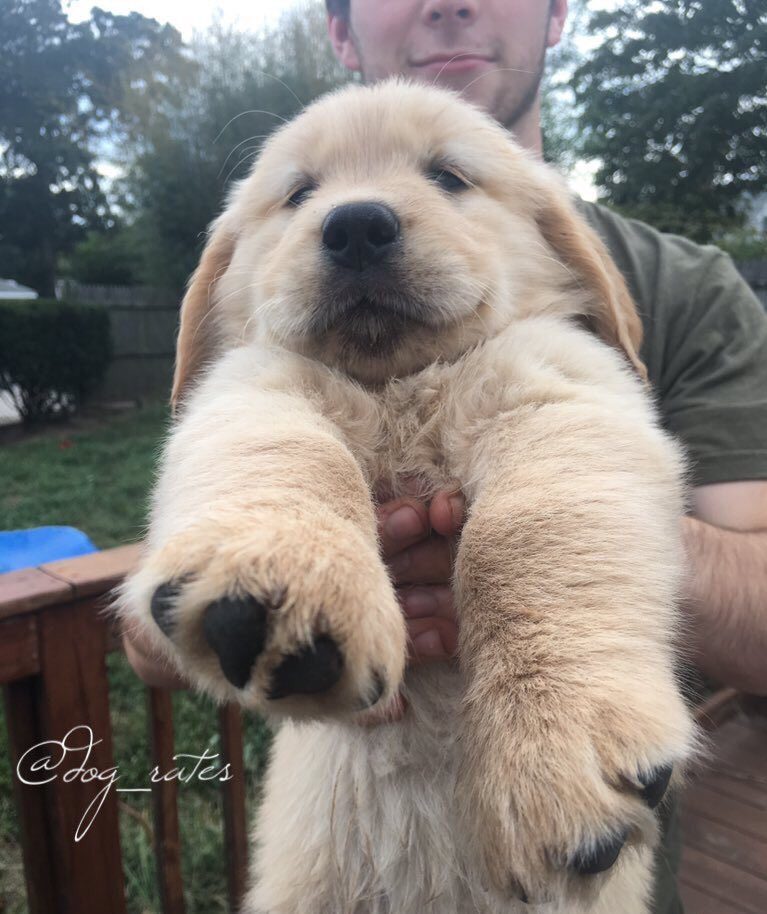

In [87]:
from IPython.display import Image
Image(tam[(tam.p1.isin(['golden_retriever'])) & (tam.rating_numerator > 10)].sample().jpg_url.values[0])

________________________________________________________________


[Back to top](#home)